#### 用CNN对mnist数据集进行训练分类

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# x_train, x_test: 60000,28,28 ===> 60000,28,28,1
x_train = x_train.reshape((-1,28,28,1)) / 255.0
x_test = x_test.reshape((-1,28,28,1)) / 255.0
# y_train = np_utils.to_categorical(y_train) 【错误：没有写one-hot的类别】
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

model = Sequential()
model.add(Conv2D(input_shape=(28,28,1), filters=32, kernel_size=5, strides=(1,1), padding='same', activation='relu', name='conv_1'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, name='maxpool_1'))
model.add(Conv2D(filters=64, kernel_size=5, strides=(1,1), padding='same', activation='relu', name='conv_2'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, name='maxpool_2'))
model.add(Flatten())
model.add(Dense(units=1024, activation='relu', name='fc_1'))
model.add(Dense(units=10, activation='softmax', name='output_0'))

adam = Adam()
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=64)

loss, acc = model.evaluate(x_test, y_test)
print('test loss is', loss, 'test accuracy is', acc)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.1105 - acc: 0.9669
Epoch 2/10
60000/60000 [==============================] - 12s 206us/step - loss: 0.0366 - acc: 0.9886
Epoch 3/10
60000/60000 [==============================] - 12s 204us/step - loss: 0.0243 - acc: 0.9920
Epoch 4/10
60000/60000 [==============================] - 12s 206us/step - loss: 0.0171 - acc: 0.9942
Epoch 5/10
60000/60000 [==============================] - 12s 205us/step - loss: 0.0134 - acc: 0.9956
Epoch 6/10
60000/60000 [==============================] - 12s 205us/step - loss: 0.0123 - acc: 0.9959
Epoch 7/10
60000/60000 [==============================] - 12s 206us/step - loss: 0.0095 - acc: 0.9970
Epoch 8/10
60000/60000 [==============================] - 12s 204us/step - loss: 0.0070 - acc: 0.9977
Epoch 9/10
60000/60000 [==============================] - 12s 204us/step - loss: 0.

#### 利用训练好的模型进行预测

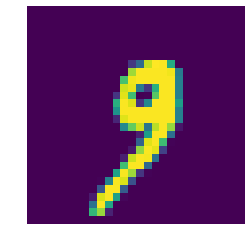

[9]


In [3]:
n = 1000

import matplotlib.pyplot as plt
plt.imshow(x_test[n].reshape(28,28))
plt.axis('off')
plt.show()

test = x_test[n].reshape((-1,28,28,1))
y = model.predict_classes(test)
print(y)